In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC


import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID, gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, InternetService, OnlineSecurity,  OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, TotalCharges and Churn columns are Object type data which needs to change to Int

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no Null Values present in the database hence we can move a head

In [6]:
columns = df.columns
for i in columns:
    a=df[i].value_counts()
    b=len(a.index)
    print(i,'column has',b,'data counts\n')

customerID column has 7043 data counts

gender column has 2 data counts

SeniorCitizen column has 2 data counts

Partner column has 2 data counts

Dependents column has 2 data counts

tenure column has 73 data counts

PhoneService column has 2 data counts

MultipleLines column has 3 data counts

InternetService column has 3 data counts

OnlineSecurity column has 3 data counts

OnlineBackup column has 3 data counts

DeviceProtection column has 3 data counts

TechSupport column has 3 data counts

StreamingTV column has 3 data counts

StreamingMovies column has 3 data counts

Contract column has 3 data counts

PaperlessBilling column has 2 data counts

PaymentMethod column has 4 data counts

MonthlyCharges column has 1585 data counts

TotalCharges column has 6531 data counts

Churn column has 2 data counts



gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod and Churn has only categorical data.

In [7]:
df = df.drop(['customerID'],axis=1)

'customerID' contains no information those are only indexes hence have removed

In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data looks fine to encode into Int

In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)

There are so many blank spots which needs to fill hence have replaced those with NaN

In [10]:
df['TotalCharges'].isna().sum()

11

There are 11 NaN present in the columns

In [11]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

Changed the datatype to Float since it has only numbers 

In [12]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

Filled NaN with Mean since the data is a continuous data.

In [13]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

Endcoded data into Int

In [14]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [15]:
x = df.drop(['Churn'],axis=1)
y = df['Churn']

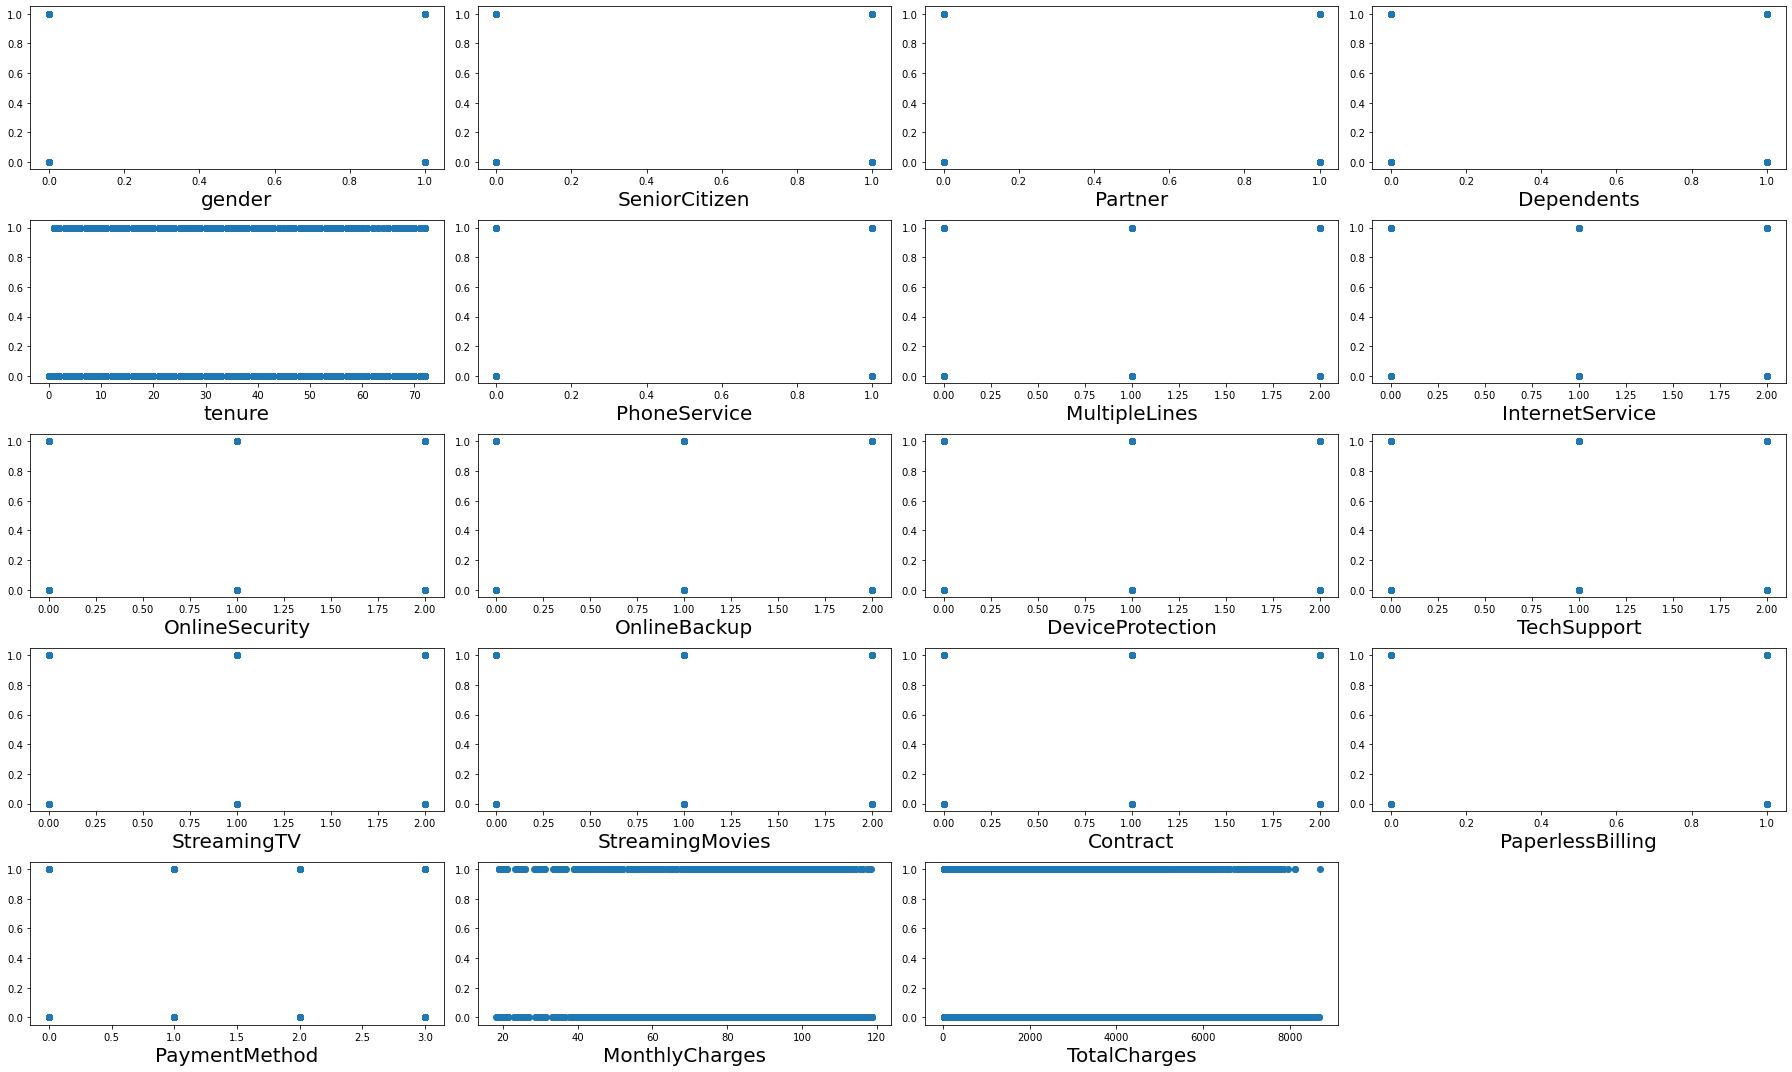

In [16]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 20:
        ax = plt.subplot(5,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

There is no clear pitcure with the co-relationship with Churn Column 

In [17]:
df.drop('Churn',axis=1).corrwith(df.Churn)

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges       -0.199428
dtype: float64

gender, PhoneService, MultipleLines, InternetService, StreamingTV and StreamingMovies have less corelation with label

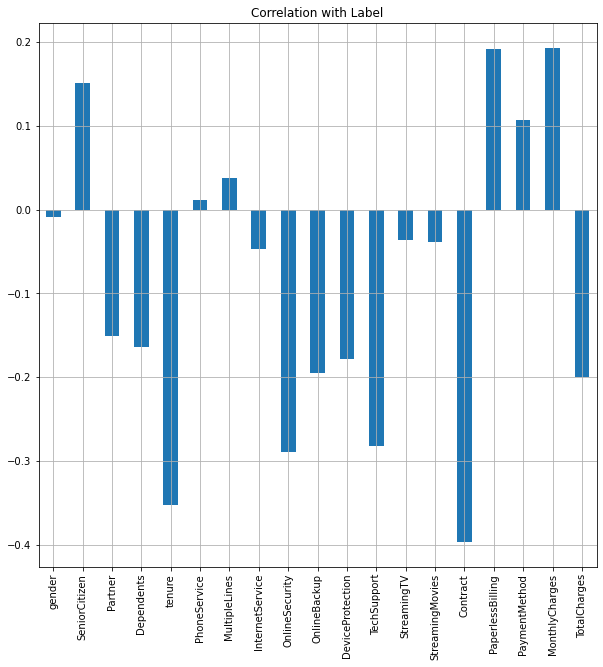

In [18]:
df.drop('Churn',axis=1).corrwith(df.Churn).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

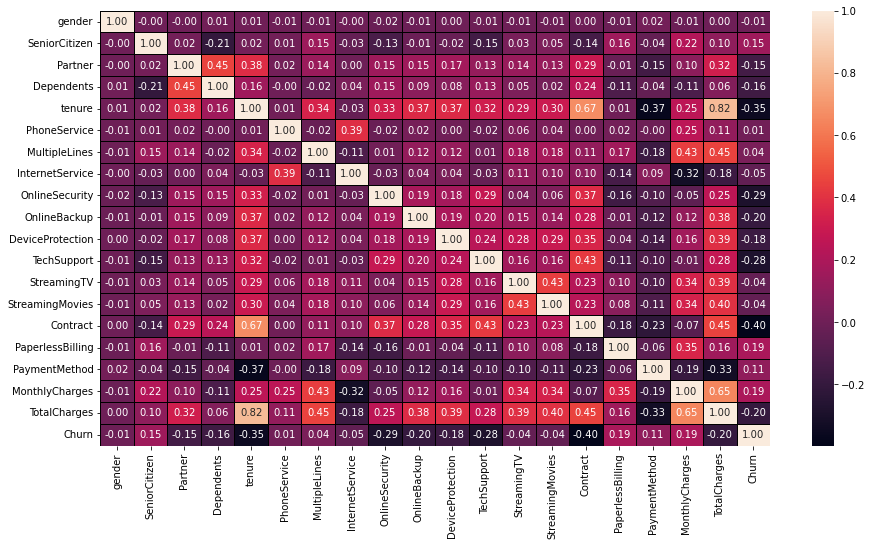

In [19]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

Multicollinearity problem does not exist in this database

In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
x = df[['gender', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies']]
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,Features,VIF
0,gender,1.855528
1,PhoneService,5.106532
2,MultipleLines,2.008783
3,InternetService,2.911077
4,StreamingTV,2.768425
5,StreamingMovies,2.776422


PhoneService column has the high VIF

In [22]:
x = df.drop('Churn',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,Features,VIF
0,gender,1.953947
1,SeniorCitizen,1.369493
2,Partner,2.821379
3,Dependents,1.963036
4,tenure,14.607408
5,PhoneService,15.133708
6,MultipleLines,2.753061
7,InternetService,4.352197
8,OnlineSecurity,2.249601
9,OnlineBackup,2.457285


In the entire data PhoneService has low co-relation with Label and has high VIF hence have dropped PhoneService column

In [23]:
df = df.drop(['PhoneService', 'gender'],axis=1)

Dropped PhoneService Column

In [24]:
x = df.drop('Churn',axis=1)
y = df['Churn']

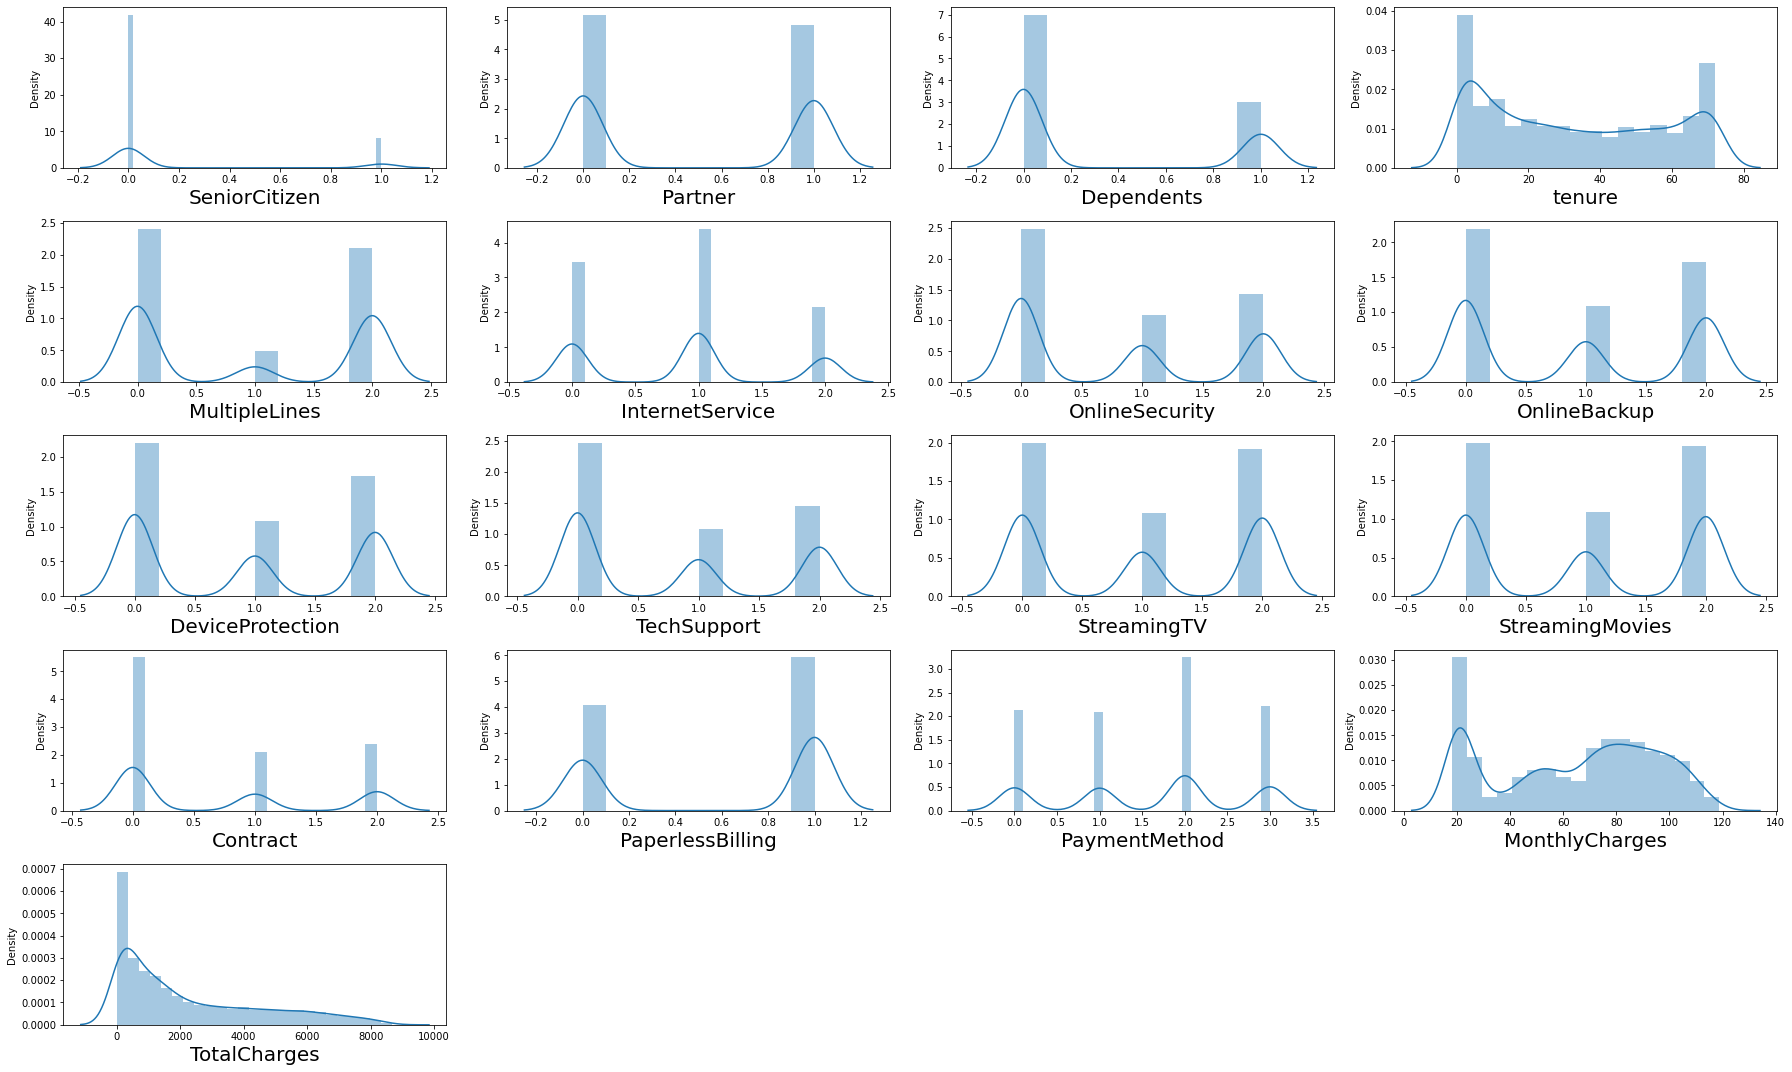

In [25]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 20:
        ax = plt.subplot(5,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

TotalCharges is a continuous data column and has skewness

In [26]:
df.skew()

SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

Not considering skewness of categorical data columns

In [27]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,72.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Database is ready to remove outliers if exist 

In [28]:
x = df.drop(['Churn'],axis=1)
y = df['Churn']

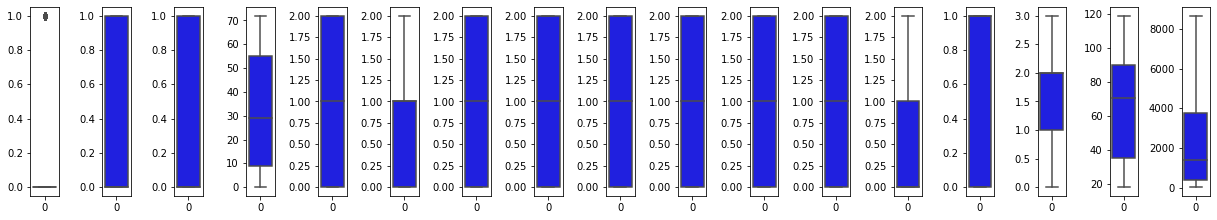

In [29]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

The Data has no outliers

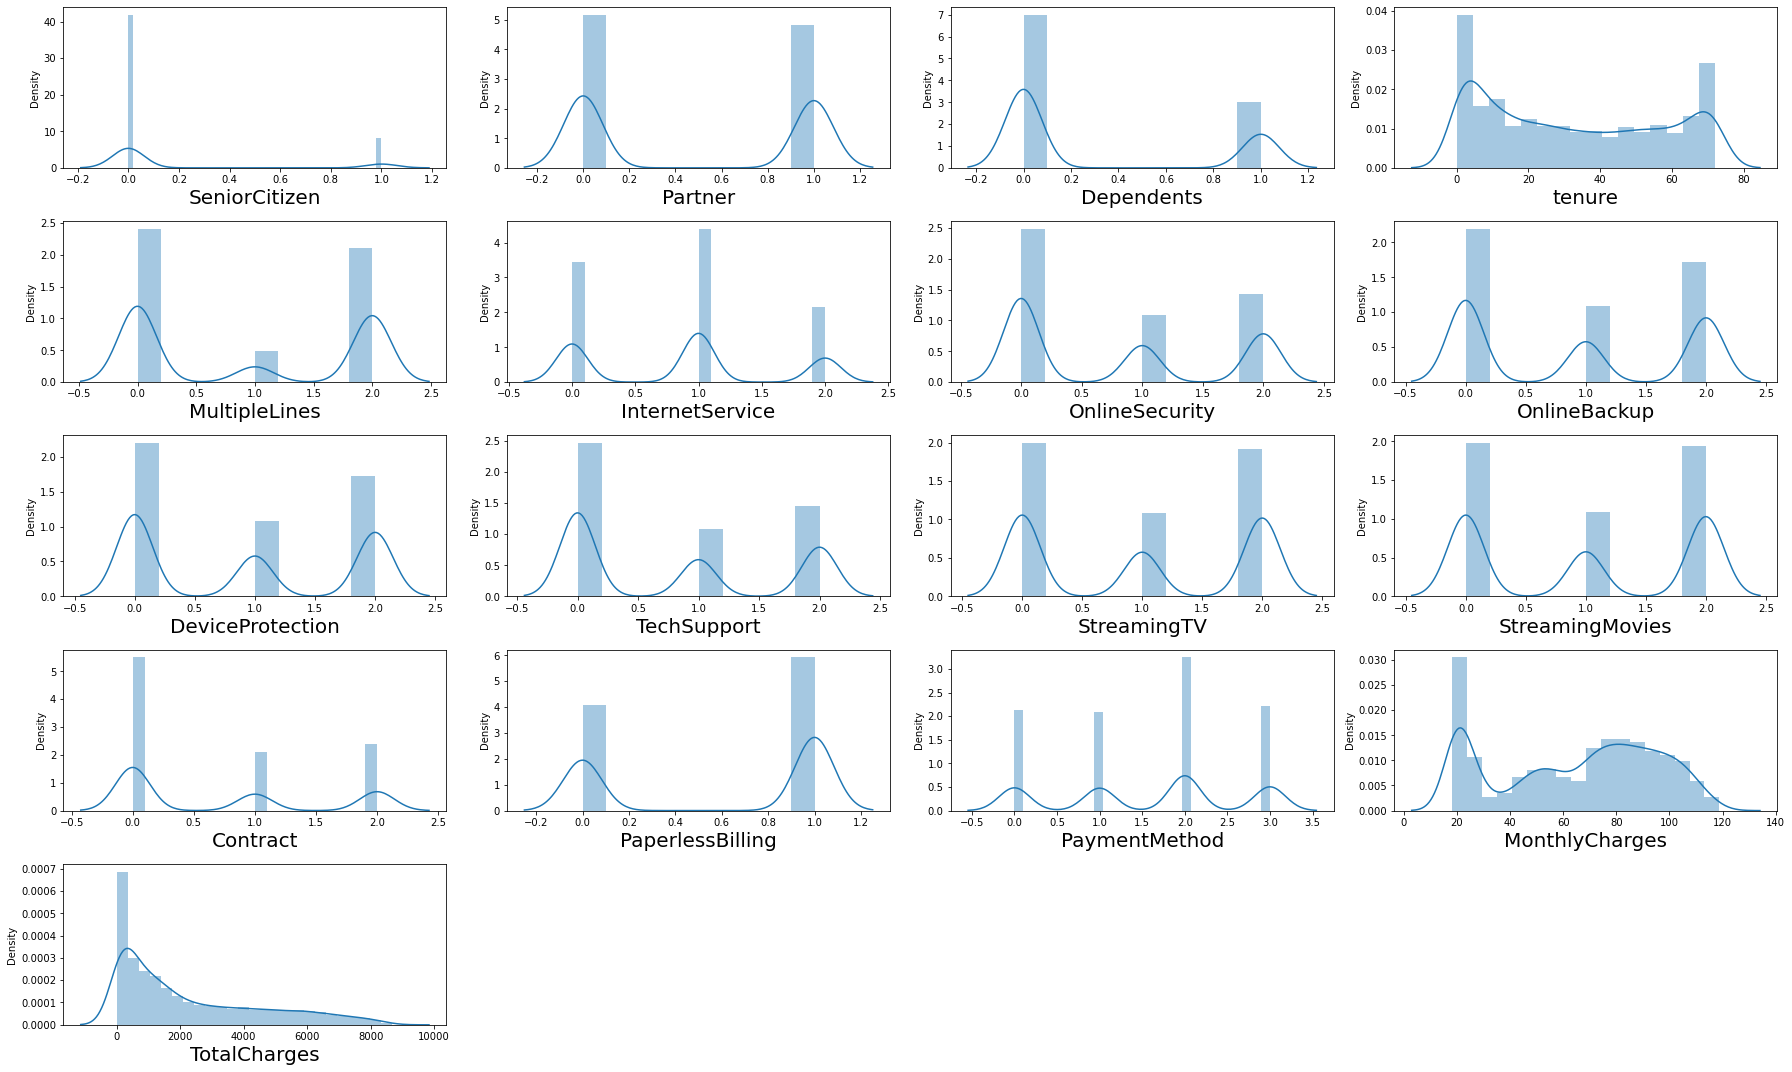

In [30]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 20:
        ax = plt.subplot(5,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

There is a skewness present in the data hence using PowerTransformer to remove it

In [31]:
scaler = PowerTransformer(method='yeo-johnson')

In [32]:
df[['TotalCharges']] = scaler.fit_transform(df[['TotalCharges']].values)

In [33]:
x = df.drop(['Churn'],axis=1)
y = df['Churn']

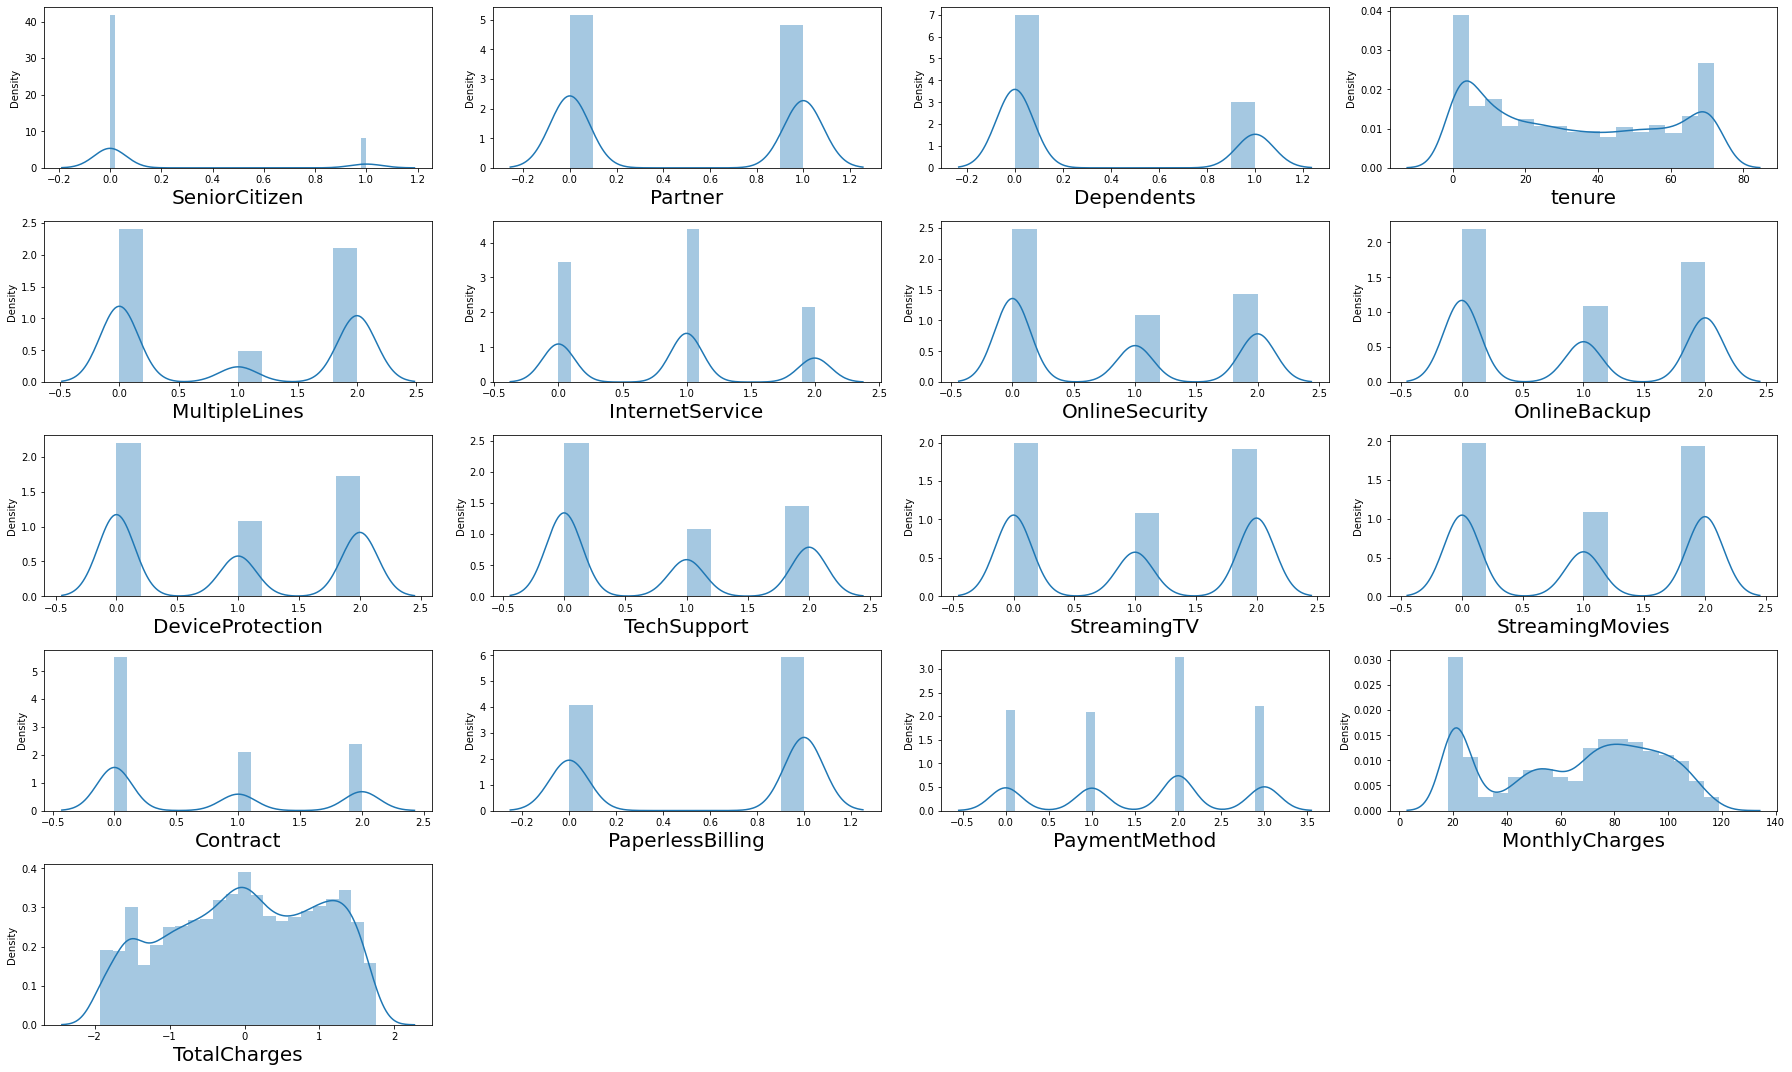

In [34]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 20:
        ax = plt.subplot(5,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Removed skewness from the data

In [35]:
x = df.drop(['Churn'],axis=1)
y = df['Churn']

In [36]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaling the data

# Model Buidling

# LogisticRegression

In [37]:
maxAccu =0 
maxRS= 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.807495741056218 Random_state 1
max_accuracy 0.807495741056218 max_Random_state 1
accuracy 0.8018171493469619 Random_state 2
accuracy 0.807495741056218 Random_state 3
accuracy 0.7853492333901193 Random_state 4
accuracy 0.7961385576377058 Random_state 5
accuracy 0.80465644520159 Random_state 6
accuracy 0.807495741056218 Random_state 7
accuracy 0.7961385576377058 Random_state 8
accuracy 0.7927314026121521 Random_state 9
accuracy 0.80465644520159 Random_state 10
accuracy 0.797274275979557 Random_state 11
accuracy 0.8035207268597387 Random_state 12
accuracy 0.8097671777399205 Random_state 13
max_accuracy 0.8097671777399205 max_Random_state 13
accuracy 0.8165814877910278 Random_state 14
max_accuracy 0.8165814877910278 max_Random_state 14
accuracy 0.8035207268597387 Random_state 15
accuracy 0.7967064168086314 Random_state 16
accuracy 0.7984099943214082 Random_state 17
accuracy 0.8194207836456558 Random_state 18
max_accuracy 0.8194207836456558 max_Random_state 18
accuracy 0.81203861

In [38]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 106)

In [39]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))
        
        scr_log = cross_val_score(clf,X_scale,y,cv=5)
        print('Cross Validation Score- ', scr_log.mean())

In [40]:
log = LogisticRegression()
log.fit(x_train,y_train)

print_score(log,x_train,x_test,y_train,y_test, train=True)
print_score(log,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 79.82%

===============Test Result===============
Accuracy Score: 82.17%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      1346
         1.0       0.63      0.57      0.60       415

    accuracy                           0.82      1761
   macro avg       0.75      0.74      0.74      1761
weighted avg       0.82      0.82      0.82      1761

Cross Validation Score-  0.8010790010645849


# RandomForestClassifier

In [41]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

print_score(rfc,x_train,x_test,y_train,y_test, train=True)
print_score(rfc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 99.77%

===============Test Result===============
Accuracy Score: 80.75%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.88      1346
         1.0       0.60      0.55      0.57       415

    accuracy                           0.81      1761
   macro avg       0.73      0.72      0.72      1761
weighted avg       0.80      0.81      0.80      1761

Cross Validation Score-  0.787450400025808


# DecisionTreeClassifier

In [42]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

print_score(dtc,x_train,x_test,y_train,y_test, train=True)
print_score(dtc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 99.77%

===============Test Result===============
Accuracy Score: 73.76%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      1346
         1.0       0.45      0.54      0.49       415

    accuracy                           0.74      1761
   macro avg       0.65      0.67      0.66      1761
weighted avg       0.76      0.74      0.75      1761

Cross Validation Score-  0.734345260178076


# GradientBoostingClassifier

In [43]:
gbdt = GradientBoostingClassifier()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 82.62%

===============Test Result===============
Accuracy Score: 81.15%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1346
         1.0       0.61      0.56      0.58       415

    accuracy                           0.81      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.81      0.81      0.81      1761

Cross Validation Score-  0.804061451545261


# Support Vector Classifier

In [44]:
svc = SVC()
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)
print_score(svc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 81.45%

===============Test Result===============
Accuracy Score: 81.60%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      1346
         1.0       0.64      0.51      0.57       415

    accuracy                           0.82      1761
   macro avg       0.75      0.71      0.72      1761
weighted avg       0.81      0.82      0.81      1761

Cross Validation Score-  0.7996609660300665


# KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print_score(knn,x_train,x_test,y_train,y_test, train=True)
print_score(knn,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 82.77%

===============Test Result===============
Accuracy Score: 77.57%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.86      0.85      0.85      1346
         1.0       0.52      0.53      0.53       415

    accuracy                           0.78      1761
   macro avg       0.69      0.69      0.69      1761
weighted avg       0.78      0.78      0.78      1761

Cross Validation Score-  0.7647301842054326


# Findings

- LogisticsRegression - Cross Validation Score is 80.10%, Accuracy Score of Train Result is 79.82% and Test Result is 82.17%
- RandomForestClassifier - Cross Validation Score is 79.00%, Accuracy Score of Train Result is 99.77% and Test Result is 80.98%
- DecisionTreeClassifier - Cross Validation Score is 73.13%, Accuracy Score of Train Result is 99.77% and Test Result is 73.99%
- GradientBoostingClassifier - Cross Validation Score is 80.40%, Accuracy Score of Train Result is 82.62% and Test Result is 81.15%
- Support Vector Classifier - Cross Validation Score is 79.96%, Accuracy Score of Train Result is 81.45% and Test Result is 81.60%
- KNeighborsClassifier - Cross Validation Score is 76.47%, Accuracy Score of Train Result is 82.77% and Test Result is 77.57%

##### Choosing Support Vector Classifier model for hyper tuning since the train and test accuracy is high and close to each other

# Hyper Parameter Tuning

In [46]:
grid_param = {
    'C': range(1,5),
    'gamma':['scale', 'auto'],
    'shrinking': [True,False],
    'probability': [True,False],
}

Selecting Parameters for Hyper Parameter Tuning

In [47]:
grid_search = GridSearchCV(estimator=svc,
                           param_grid=grid_param,
                           cv=3,
                           n_jobs =-1
                          )

Searching the best grid for the model

In [48]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(1, 5), 'gamma': ['scale', 'auto'],
                         'probability': [True, False],
                         'shrinking': [True, False]})

Training the model (Note:- Have not added more parameters since it was taking a long time to train and the laptop is not that powerful to load this code hence have removed some parameters)

In [49]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 1, 'gamma': 'auto', 'probability': True, 'shrinking': True}


In [50]:
svc = SVC(C= 1, gamma= 'auto', probability=True, shrinking=True)
svc.fit(x_train,y_train)

SVC(C=1, gamma='auto', probability=True)

Applying best parameters to train the model

In [51]:
y_pred = svc.predict(x_test)
pred = svc.predict(x_train)

In [52]:
print(f'Train Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%')
print(f'Test Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(classification_report(y_test, y_pred))

Train Accuracy Score: 81.45%
Test Accuracy Score: 81.66%
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      1346
         1.0       0.64      0.51      0.57       415

    accuracy                           0.82      1761
   macro avg       0.75      0.71      0.73      1761
weighted avg       0.81      0.82      0.81      1761



- Previous Train accuracy score - 81.45% and New Train accuracy score - 81.45%
- Previous Test accuracy score - 81.60% and New Test accuracy score - 81.66%

# AUR ROC Curve

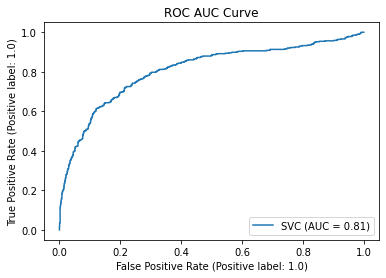

In [53]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc,x_test,y_test)
plt.title("ROC AUC Curve")
plt.show()

#### Accuracy score of Support Vector Classifier after Tuning the model is 81.66% and AUC score is 81% which is pretty good

## Saving the Model

In [54]:
file = 'Customer_Churn_Analysis.pickle'
pickle.dump(svc, open(file, 'wb'))